# Grupo 13
# Alumnos: 
- José Ignacio Dagrava.
- Rodrigo Andres Marquez Brizuela

------------------------------

# Preparación Actividad

In [ ]:
#Importamos las librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Creamos el Dataframe leyendo el CSV desde la url indicando a pandas que use
# los separadores "," y "." para los miles y decimales, respectivamente.
url= "https://raw.githubusercontent.com/md-lorente/data/master/worlddometer_covid_ue.csv"
df= pd.read_csv(url, sep= ";", thousands=",", decimal= ".")
# Visualización del dataframe (La cabecera de los 10 paises con mayores casos)
df.head(10)

,Num,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,0,Europe,3543710,10493.0,207347.0,149.0,2063335.0,1273028.0,5619.0,NaN,NaN,NaN,NaN,NaN
1,1,Russia,990326,498.0,17093.0,68.0,806982.0,166251.0,23.0,6786.0,117.0,36400000.0,249409.0,145944843.0
2,2,Spain,455621,NaN,29011.0,NaN,NaN,NaN,751.0,9744.0,620.0,8517446.0,182161.0,46757783.0
3,3,UK,332752,NaN,41498.0,NaN,NaN,NaN,60.0,4897.0,611.0,16273209.0,239508.0,67944393.0
4,4,France,272530,NaN,30602.0,NaN,86177.0,155751.0,387.0,4174.0,469.0,6175223.0,94571.0,65297356.0
5,5,Italy,266853,NaN,35473.0,NaN,208224.0,23156.0,79.0,4415.0,587.0,8509618.0,140778.0,60447003.0
6,6,Germany,242825,NaN,9363.0,NaN,217484.0,15978.0,245.0,2897.0,112.0,11208091.0,133703.0,83828051.0
7,7,Ukraine,119074,2096.0,2527.0,35.0,56734.0,59813.0,177.0,2725.0,58.0,1536171.0,35161.0,43689434.0
8,8,Romania,86785,952.0,3578.0,39.0,37665.0,45542.0,492.0,4516.0,186.0,1795633.0,93445.0,19216003.0
9,9,Belgium,84599,647.0,9891.0,5.0,18403.0,56305.0,72.0,7294.0,853.0,2261043.0,194953.0,11597901.0


In [ ]:
# Utilizamos el metodo describe para analizar las variables
# y encontrar si hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Num                     49 non-null     int64  
 1   Country                 49 non-null     object 
 2   Total Cases             49 non-null     int64  
 3   New Cases               17 non-null     float64
 4   Total Deaths            46 non-null     float64
 5   New Deaths              7 non-null      float64
 6   Total Recovered         45 non-null     float64
 7   Active Cases            45 non-null     float64
 8   Serious Critical        37 non-null     float64
 9   Total Cases per 1M pop  48 non-null     float64
 10  Deaths per 1M pop       45 non-null     float64
 11  Total Tests             47 non-null     float64
 12  Tests per 1M pop        47 non-null     float64
 13  Population              48 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory u

Se observa que el dataset cuenta con 49 observaciones y que algunas de sus variables tiene valores faltantes, porque lo que la calidad del dataset no es la mejor que podriamos esperar. Mas alla de estos comentarios debemos destacar que aunque los 6 paises con mayores casos por Covid-19 son: Rusia, España, UK, Francia, Italia y Alemania, se va a optar por eliminar Rusia del estudio e incluir a Ucrania en su lugar, ya que éste tiene una población similar al resto de los paises que a afectos del análisis y realizar comparaciones se ajusta mejor. Habiendo dicho esto, nuestro espacio muestral queda:

    S = {Spain, UK, France, Italy, Germany, Ukraine}
  
Como el dataset tiene información de muchos otros paises, filtraremos los paises de nuestro universo para estudiarlos con mayor facilidad y realizar comparatorias entre ellos que sean de mayor objetividad.

In [ ]:
covid_df = df[(df["Country"] == "Ukraine") | (df["Country"] == "Spain")|\
                    (df["Country"] == "France")| (df["Country"] == "UK")|\
                    (df["Country"] == "Italy") | (df["Country"] == "Germany")]

In [ ]:
covid_df

,Num,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
2,2,Spain,455621,NaN,29011.0,NaN,NaN,NaN,751.0,9744.0,620.0,8517446.0,182161.0,46757783.0
3,3,UK,332752,NaN,41498.0,NaN,NaN,NaN,60.0,4897.0,611.0,16273209.0,239508.0,67944393.0
4,4,France,272530,NaN,30602.0,NaN,86177.0,155751.0,387.0,4174.0,469.0,6175223.0,94571.0,65297356.0
5,5,Italy,266853,NaN,35473.0,NaN,208224.0,23156.0,79.0,4415.0,587.0,8509618.0,140778.0,60447003.0
6,6,Germany,242825,NaN,9363.0,NaN,217484.0,15978.0,245.0,2897.0,112.0,11208091.0,133703.0,83828051.0
7,7,Ukraine,119074,2096.0,2527.0,35.0,56734.0,59813.0,177.0,2725.0,58.0,1536171.0,35161.0,43689434.0


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2 to 7
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Num                     6 non-null      int64  
 1   Country                 6 non-null      object 
 2   Total Cases             6 non-null      int64  
 3   New Cases               1 non-null      float64
 4   Total Deaths            6 non-null      float64
 5   New Deaths              1 non-null      float64
 6   Total Recovered         4 non-null      float64
 7   Active Cases            4 non-null      float64
 8   Serious Critical        6 non-null      float64
 9   Total Cases per 1M pop  6 non-null      float64
 10  Deaths per 1M pop       6 non-null      float64
 11  Total Tests             6 non-null      float64
 12  Tests per 1M pop        6 non-null      float64
 13  Population              6 non-null      float64
dtypes: float64(11), int64(2), object(1)
memory usa

Habiendo reducido el dataset a los 6 paises de objeto de estudio, observamos ahora que algunas de las variables aun siguen con valores faltantes pero dado que nuestro estudio se aplica directamente sobre las variables Total Cases, Country, Total Deaths, Deaths Per 1M pop, Test per 1M pop y total Cases per 1M pop, los valores faltantes de estas otras no nos afectara la calidad de nuestra conclusiones y estudio.

# Análisis de las variables
Las variables que se encuentran en el dataset son:

Country: Es una variable cualtitativa nominal que se utilizará como categórica a efectos del análisis. Da información sobre el "nombre" de la observación y permite entender a cual nos referimos.

El resto de las variables son cuantitativas discretas ya que refieren a casos por personas, test por millón de habitantes y a población en general (en el caso de Population). Son variables que no pueden tomar infinitos valores dentro de un intervalo; se computan de a valores enteros por cada caso/test/persona del dataset. A efectos del análisis serán tomadas como variables analíticas.

Antes de comenzar con el análisis probabilístico solicitado en la práctica, procedemos a hacer un análisis de algunas variables de interés que puedan explicar una mayor supervivencia en ciertos países. Con tal motivo, realizaremos un análisis de estadística unidimensional para las variables:

Total Cases per 1 M Pop

Deaths per 1 M Pop

Tests per 1 M Pop


El motivo de análisis de estas tres variables en particular es que en los tres casos, se toma como base de cálculo el millón de población. Por este motivo, la situación de las variables en cada país se hacen comparables entre ellas. Si se compararan variables absolutas (ej.: Total de muertes en España VS total de muertes en Alemania, se tendría que tomar en cuenta el tamaño de la población de ambos países) los estadísticos arrojados podrían ser mas difícilmente comparables por la diferencia de escalas de cada país.

In [ ]:
# Análisis estadístico unidimensional: Total Cases per 1 M pop

print(covid_df["Total Cases per 1M pop"].describe())

print("\nCoeficiente de variación de Spearman: {}".format(covid_df["Total Cases per 1M pop"].std()/covid_df["Total Cases per 1M pop"].mean()))



count       6.000000
mean     4808.666667
std      2565.900596
min      2725.000000
25%      3216.250000
50%      4294.500000
75%      4776.500000
max      9744.000000
Name: Total Cases per 1M pop, dtype: float64

Coeficiente de variación de Spearman: 0.5335991811241632


In [ ]:
data_sin_spain_df= pd.DataFrame(covid_df.copy())
data_sin_spain_df = data_sin_spain_df[data_sin_spain_df["Total Cases per 1M pop"] != 9744]

print(data_sin_spain_df["Total Cases per 1M pop"].describe())

print("\nCoeficiente de Spearman: {}".format(data_sin_spain_df["Total Cases per 1M pop"].std()/data_sin_spain_df["Total Cases per 1M pop"].mean()))

count       5.000000
mean     3821.600000
std       960.496122
min      2725.000000
25%      2897.000000
50%      4174.000000
75%      4415.000000
max      4897.000000
Name: Total Cases per 1M pop, dtype: float64

Coeficiente de Spearman: 0.25133350476337846


Text(0.5, 1.0, 'Boxplot Casos por MM de habitantes')

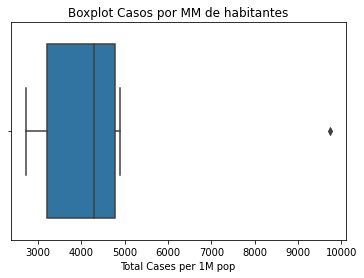

In [ ]:
sns.boxplot(x=covid_df["Total Cases per 1M pop"])
plt.title("Boxplot Casos por MM de habitantes")

En el análisis de casos totales por millón de habitantes, podemos ver que hay un valor outlier que influencia fuertemente los estadísticos de resumen de la población estudiada. En el caso del coeficiente de variación, si se extrae España y se estudia su efecto, se puede ver que los casos de dicho país generan que el coeficiente incremente en un 28% y genere mayor heterogeneidad en los datos. Esto se traduce también en que la deviación estandar también cambia drásticamente, lo cual tiene sentido ya que el coeficiente de variación es "desviación estandar / media".

In [ ]:
# Análisis estadístico unidimensional: Deaths per 1 M pop

print(covid_df["Deaths per 1M pop"].describe())

print("\nCoeficiente de variación de Spearman: {}".format(covid_df["Deaths per 1M pop"].std()/covid_df["Deaths per 1M pop"].mean()))

count      6.000000
mean     409.500000
std      257.688766
min       58.000000
25%      201.250000
50%      528.000000
75%      605.000000
max      620.000000
Name: Deaths per 1M pop, dtype: float64

Coeficiente de variación de Spearman: 0.6292765952676698


Text(0.5, 1.0, 'Boxplot Muertes por MM de habitantes')

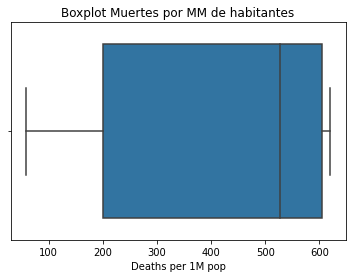

In [ ]:
sns.boxplot(x=covid_df["Deaths per 1M pop"])
plt.title("Boxplot Muertes por MM de habitantes")

A nivel de muertes se puede ver mayor heterogeneidad y que no es solamente influida por un solo valor outlier. Hay valores muy disimiles entre los distintos países y esto puede deberse a varios motivos. Uno de los motivos puede ser la cantidad de tests realizados por millón de habitantes, ya que el *no diagnóstico* puede llegar a infravalorar la mortalidad del COVID en los países. A menor cantidad de tests, mayor es el riesgo de subvalorar el efecto del COVID (Fuente: https://apps.who.int/iris/bitstream/handle/10665/333857/WHO-2019-nCoV-Sci_Brief-Mortality-2020.1-spa.pdf).

Por otro lado, cabe analizar la distribución demográfica de los países. Esto se debe a que la población envejecida tiene mayor mortalidad y severidad de la enfermedad, lo cual puede explicar algunas de las diferencias entre los distintos países. 

Para los datos demográficos, utilizamos como fuentes de datos Eurostat (https://ec.europa.eu/eurostat/databrowser/view/tps00010/default/table?lang=en) y la oficina nacional de estadística de UK (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland). 

Cabe mencionar que la información de Eurostat está a enero 2020, mientras que la de ONA está a mitad de 2020. 

Por último, para homogeneizar los datos (categorización de las edades, principalmente) se tuvo que modificar/agrupar algunos de los datos de ONA para generar comparabilidad.

In [ ]:
demografia_df = pd.read_csv("https://raw.githubusercontent.com/rmarquez93/data_masterbdds2022/main/demografia_paises.csv", sep= ";",\
                            decimal= ".")

#Realizamos un pivot de la tabla 
demografia_df = pd.pivot_table(demografia_df, values="OBS_VALUE", columns=["indic_de"], index= ["geo"], aggfunc= np.max)
demografia_df

indic_de,0-14,15-24,24-49,50-64,65-79,>=80
geo,,,,,,
DE,13.7,10.3,31.3,23.0,14.9,6.8
ES,14.5,10.0,34.8,21.0,13.6,6.0
FR,17.9,11.8,30.7,19.2,14.3,6.2
IT,13.0,9.8,31.7,22.3,15.8,7.4
UA,15.3,9.5,37.6,20.5,12.6,4.5
UK,17.9,11.7,32.3,19.4,13.6,5.1


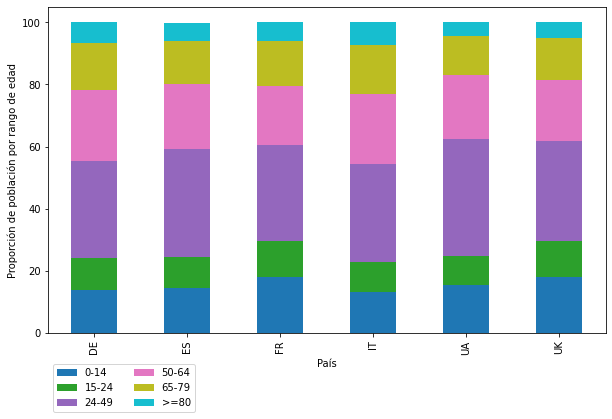

In [ ]:
demografia_df.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))
plt
plt.legend(loc='upper left', bbox_to_anchor=(0.0, -0.08), ncol=2)
plt.ylabel("Proporción de población por rango de edad")
plt.xlabel("País")



plt.show()

Se puede notar a partir de este gráfico y la tabla anteriormente generada, la diferencia que hay en la distribución de la población por franja de edad en los distintos países. Esta distribución puede ayudar a entender la alta mortalidad en Italia (la población mas envejecida del conjunto analizado). 

In [ ]:
# Análisis estadístico unidimensional: Tests per 1 M pop

print(covid_df["Tests per 1M pop"].describe())
print("\nCoeficiente de variación de Spearman: {}".format(covid_df["Tests per 1M pop"].std()/covid_df["Tests per 1M pop"].mean()))

count         6.000000
mean     137647.000000
std       70344.068387
min       35161.000000
25%      104354.000000
50%      137240.500000
75%      171815.250000
max      239508.000000
Name: Tests per 1M pop, dtype: float64

Coeficiente de variación de Spearman: 0.5110468690690803


En el caso de los tests realizados, el coeficiente de variación vuelve a mostrar cierta heterogeneidad en los datos. En este caso, hay países por debajo del primer cuartil (Ucrania y Francia), dentro del IQR (Italia y Alemania) y por encima del tercer cuartil (España y UK). 

Esto nos denota que los tests realizados por millón de habitantes fue bastante diferente dependiendo del país y las políticas o criterios tomados a la hora de solicitar un PCR para el paciente que consulta. 

Este dato es el que mas puede variar dependiendo de la política adoptada por el país ya que tanto las defunciones como los casos positivos suponemos (a partir de lo solicitado en el ejercicio) que fueron realizados con PCR y por lo tanto, las poblaciones de análisis de cada país son mas facilmente identificables. En el caso de los tests, se dependió del criterio adoptado por cada país para solicitar PCR a cada potencial paciente. 

# Análisis probabilístico 

Yendo al análisis probabilístico, podemos decir que la base de cálculo para los supervivientes resulta de la sustracción al total de casos del total de muertes, lo cual se traduce en:

p(sobrevivir) = 1 - (p(muerte) = 1 - (Total Deaths / Total Cases) 

Esto va en línea con la definición de la OMS para el cálculo de la razón de letalidad de la infección a agosto 2020 (Fuente: https://apps.who.int/iris/bitstream/handle/10665/333857/WHO-2019-nCoV-Sci_Brief-Mortality-2020.1-spa.pdf ).

A su vez, y abstrayendo el caso al análisis puramente probabilístico, tomamos la visión de Laplace a la hora de calcular probabildades. Esto es, tomar la probabilidad del suceso como la división del recuento de dicho suceso entre la sumatoria total de casos posibles. Lo anterior, en este caso en concreto, se traduce también como:

número de sobrevivientes / total de casos = 1 - (número de muertes / total de casos)

## Tabla resumen


Dada la siguiente tabla de doble entrada se obtienen las probabilidades de las intersecciones por cada país y fallecer / Sobrevivir. También se obtienen las probabilidades totales de Fallecer, Sobrevivir y las totales de cada país.

Dicho en otras palabras, la probabilidad de españa es la probabilidad de tomar al azar una persona afectada con COVID (ya sea fallecida o no) y que esta persona sea residente de España, lo que es igual a 26,97 %

Algo similar podemos decir con respecto a la probabilidad de Fallecer, esto seria, la probabilidad de tomar al azar una persona fallecida residente en cualquiera de los 6 paises el estudio, y es igual al 8,79%.

In [ ]:
df_prob = covid_df[["Country"]].copy()

#Calculo de la probabilidad de fallecer y país (es decir, Fallecer intersercción país)
df_prob["Fallecer"] = covid_df["Total Deaths"] /covid_df["Total Cases"].sum()

#Cálculo de la probabilidad de fallecer y pais
df_prob["Sobrevivir"] = (covid_df["Total Cases"] - covid_df["Total Deaths"]) / covid_df["Total Cases"].sum()

#Cálculo de la probabilidad por país
df_prob["Total"] = df_prob["Fallecer"] + df_prob["Sobrevivir"]

#Agrego una fila mas que es la suma total de cada columna
new_row = pd.DataFrame([['Total',df_prob.Fallecer.sum(),sum(df_prob.Sobrevivir),df_prob.Total.sum()]], 
                       columns=["Country","Fallecer","Sobrevivir","Total"])
df_prob = pd.concat([df_prob, new_row], axis=0)

df_prob.T

,2,3,4,5,6,7,0
Country,Spain,UK,France,Italy,Germany,Ukraine,Total
Fallecer,0.01717,0.02456,0.018111,0.020994,0.005541,0.001496,0.087872
Sobrevivir,0.252483,0.172375,0.143182,0.136939,0.138171,0.068977,0.912128
Total,0.269653,0.196935,0.161293,0.157933,0.143713,0.070472,1.0


Dada la probabilidad de sobrevivir en cada país, se obseva que España es uno de los que mayor probabalidad de sobrevivir tiene de los 6 paises del objeto de estudio con un P = 25,25 % siendo también el que mayor numero casos de covid positivo ha dado. Esto, nos puede indicar que si bien se vio afectada por casos positivos de covid, no se vio fatalmente perjudicada comparados con otro paises. Esto puede deberse a la proporción de ciudadanos de edad adulta es menor en comparación con otros paises, como es el caso de Italia (con una Probabilidad = 13,70%) que tiene una mayor porcentaje de ciudadanos adultos mayores de 65 años (Como se observa en la tabla demográfica por paises). Por lo que, como se ve en la tabla, la probabilidad de Fallecer en Italia por covid, es mayor que la de España debido a que el virus afecta fatalmente a las personas adultas.


Aunque Ukraine tiene una probabilidad inferior al resto, no podemos asegurar y que sea comparable con el resto de paises, ya que la relación de cantidad de test realizados por millon de habitantes un muy inferior a los demas paises, por ende puede haber un gran numero de casos e incluso muertes por covid que no fueron contabilizados por el país. Mas alla de esto, la proporción de personas adultas es menor que la de Italia por lo que esto nos confirma nuestra teoría de que Italia es unos de los paises mas damnificados por el virus.

## Probabilidad condicionada

La probabilidad condicionada se puede obtener de dos maneras, dada la P(B|A) es la probabilidad de la intersección entre ambas / P(A), o bien también mediante reducción del todos los casos posibles, ya que si queremos obtener la probabilidad de España sabiendo que ha ocurrido un fallecimiento, ahora nuestro universo se puede reducir al total de casos fallecidos; por lo tanto es Cantidad de Total Deaths en españa / Total Deaths del universo. Habiendo dicho, calculemoslo mediante la primer forma usando la tabla de doble entrada



In [ ]:
# Hacemos una copia del dataset  con las variables que vamos a trabajar.
probabilidades_df = pd.DataFrame(covid_df[["Country", "Total Cases","Total Deaths"]].copy())

probabilidades_df["País | Morir"] = df_prob["Fallecer"] / df_prob.loc[df_prob["Country"] == 'Total']["Fallecer"].sum()
probabilidades_df["País | Sobrevivir"] = df_prob["Sobrevivir"] / df_prob.loc[df_prob["Country"] == 'Total']["Sobrevivir"].sum()

#Ordenamos la salida para una clara y fácil interpretación
probabilidades_df[["Country","País | Morir" ]].sort_values(by='País | Morir')


,Country,País | Morir
7,Ukraine,0.017020
6,Germany,0.063062
2,Spain,0.195394
4,France,0.206110
5,Italy,0.238917
3,UK,0.279497


Si tomamos al alzar una persona que haya fallecido, la probabilidad de que esta fuera residente de España es de 19,54%. Una probabilidad un tanto más baja que la de UK que con una probabilidad del 27,95 % tendremos mas chances de que al escoger una persona fallecida esta sea de UK.

## Arbol de decisión

Dada las probabilidades obtenidas en los apartados anterior, las podemos representar con este árbol de decisión para que nos ayude a entender mejor las probabilidades obtenidas y como se distribuyen las probabilidades.

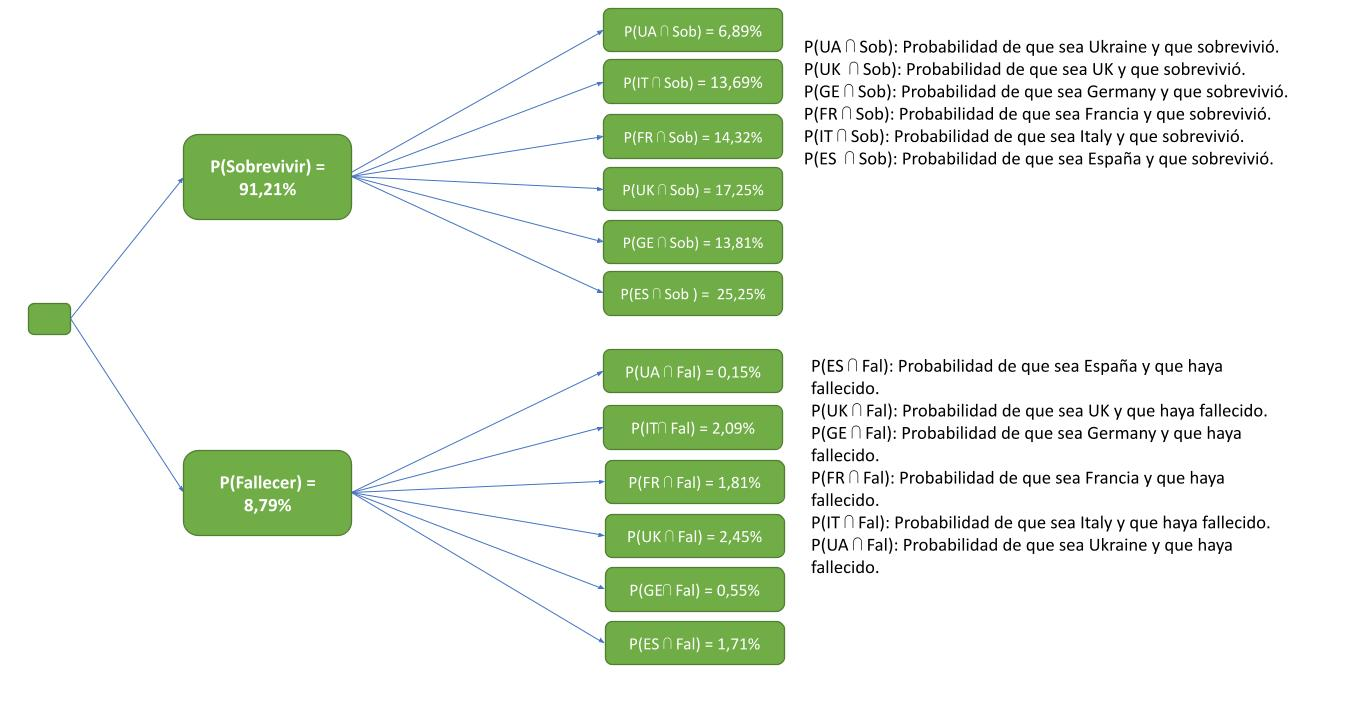

# Conclusión

Como conclusión del análisis, podemos decir que, para la población de estudio, las probabilidades de supervivencia son altas en general para todos los países observados. De todas maneras, las diferencias entre ellos en lo referente a sus respectivas tasas de mortalidad pueden guiar el camino a entender las claves del éxito/fracaso del manejo de la pandemia. Como vimos anteriormente, el envejecimiento de la población es uno de los factores claves del aumento del riesgo del COVID, pero no es el único. La falta de PCRs realizados puede subvalorar los números respecto a la pandemia, como también las políticas tomadas por cada país (ej.: cuarentena, mascarilla obligatoria, etc.) podrían arrojar mas luz sobre cual fue el camino óptimo a tomar para el dataset estudiado en su contexto temporal (febrero 2020).